### 행복지수 데이터 분석

1. 분석 대상 데이터 수집

대한민국 행복지도 사이트 접속 (http://www.happykorea.re.kr/)

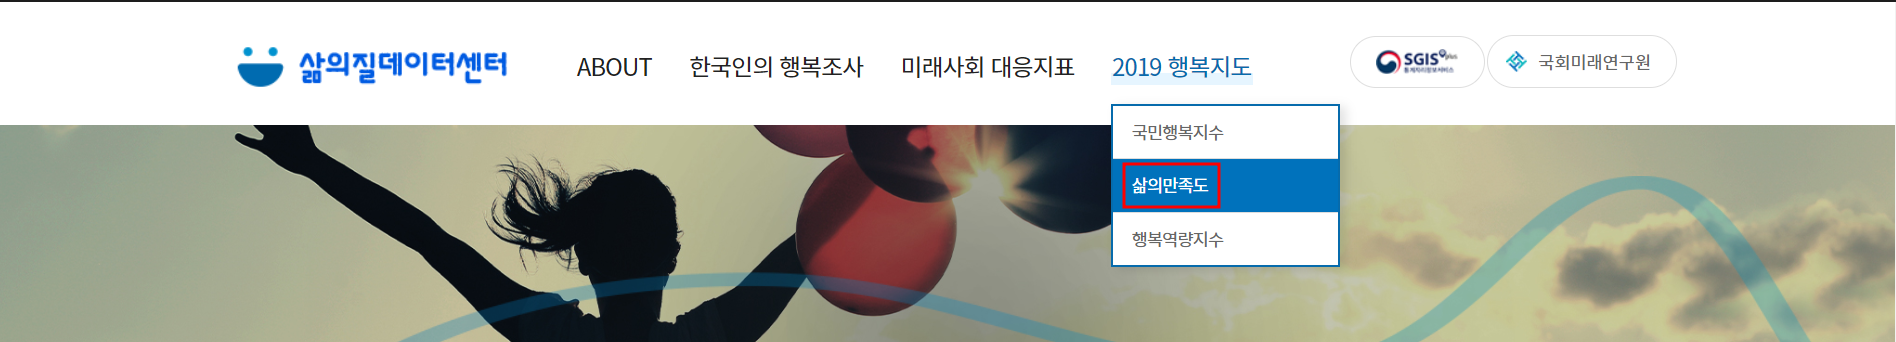

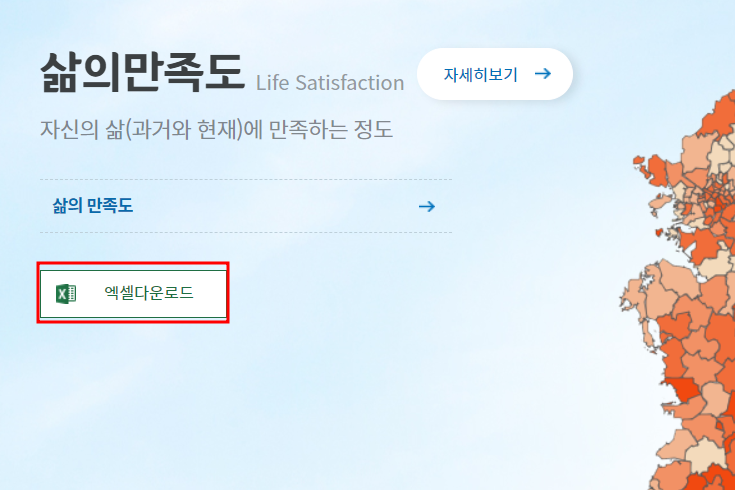

다른 이름으로 저장

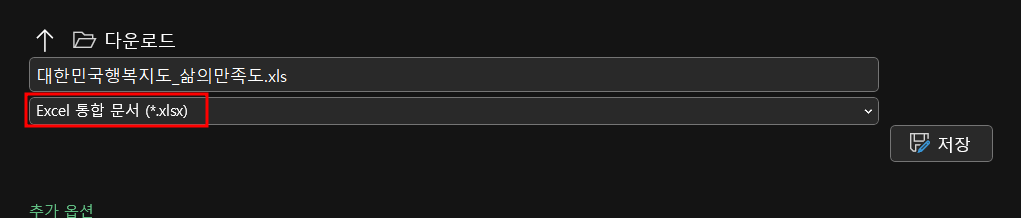

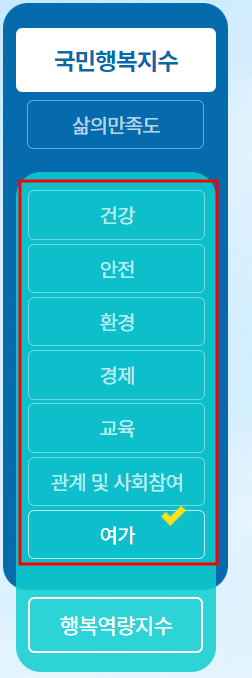

각각 엑셀 다운로드. 동일한 방법으로 xlsx로 저장

In [2]:
!pip install openpyxl

     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     ------ ------------------------------ 41.0/250.0 kB 653.6 kB/s eta 0:00:01
     -------------------------------------  245.8/250.0 kB 3.0 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 2.2 MB/s eta 0:00:00


In [35]:
from glob import glob
dataList = r"C:\Users\bluecom014\Desktop\data\csv 파일\행복지수\*.xlsx"
for file in glob(dataList):
    print(file.split('_')[1].split('.')[0])


건강
경제
관계 및 사회참여
교육
삶의만족도
안전
여가
환경


In [38]:
import pandas as pd
dataList = r"C:\Users\bluecom014\Desktop\data\csv 파일\행복지수\*.xlsx"
cnt = 0
file = glob(dataList)[cnt]; cnt+=1
건강 = pd.read_excel(file).iloc[:, 1:4]

file = glob(dataList)[cnt]; cnt+=1
경제 = pd.read_excel(file).iloc[:, 1:4]

file = glob(dataList)[cnt]; cnt+=1
관계및사회참여 = pd.read_excel(file).iloc[:, 1:4]

file = glob(dataList)[cnt]; cnt+=1
교육 = pd.read_excel(file).iloc[:, 1:4]

file = glob(dataList)[cnt]; cnt+=1
삶의만족도 = pd.read_excel(file).iloc[:, 1:4]

file = glob(dataList)[cnt]; cnt+=1
안전= pd.read_excel(file).iloc[:, 1:4]

file = glob(dataList)[cnt]; cnt+=1
여가 = pd.read_excel(file).iloc[:, 1:4]

file = glob(dataList)[cnt]; cnt+=1
환경 = pd.read_excel(file).iloc[:, 1:4]

In [43]:
건강[(건강['시도']=='서울특별시') & (건강['구군']=='중구')]

,시도,구군,평균
1,서울특별시,중구,0.6742


In [44]:
건강[(건강['시도']=='서울특별시') & (건강['평균']>=0.5)]

,시도,구군,평균
0,서울특별시,종로구,0.9220
1,서울특별시,중구,0.6742
2,서울특별시,용산구,0.5898
4,서울특별시,광진구,0.6373
5,서울특별시,동대문구,0.6024
6,서울특별시,중랑구,0.5225
12,서울특별시,서대문구,0.8437
13,서울특별시,마포구,0.5414
14,서울특별시,양천구,0.6074
16,서울특별시,구로구,0.5995


In [51]:
건강[(건강['평균']>0.8) | (건강['평균']<0.3)]['시도'].value_counts()[5:]

시도
충청남도       6
대구광역시      4
인천광역시      3
부산광역시      3
충청북도       2
서울특별시      2
제주특별자치도    2
세종특별자치시    1
전라북도       1
울산광역시      1
대전광역시      1
광주광역시      1
Name: count, dtype: int64

In [60]:
# '특별'이 포함된 시도 자료 중에서 평균값이 0.8 보다 크거나 또는 평균값이 0.3보다 작은 시도 필드만 보여줘

건강[(건강['시도'].str.contains('특별')) & ((건강['평균']>0.8) | (건강['평균']<0.3))]

,시도,구군,평균
0,서울특별시,종로구,0.9220
12,서울특별시,서대문구,0.8437
74,세종특별자치시,세종시,0.2320
227,제주특별자치도,제주시,0.2537
228,제주특별자치도,서귀포시,0.2537


In [65]:
건강['시도'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [66]:
## 건강자료에서 시도별로 자료를 저장
## 건강_서울특별시.csv로 저장
## 건강_부산광역시.csv로 저장
## 건강_경기.csv로 저장

조건리스트 = 건강['시도'].unique()

for 조건 in 조건리스트:
    tmp = 건강[건강['시도']==조건]
    tmp.to_csv('시도별/'+조건+'.csv', index=False, encoding='cp949')
    print(조건, 'save 완료')

서울특별시 save 완료
부산광역시 save 완료
대구광역시 save 완료
인천광역시 save 완료
광주광역시 save 완료
대전광역시 save 완료
울산광역시 save 완료
세종특별자치시 save 완료
경기도 save 완료
강원도 save 완료
충청북도 save 완료
충청남도 save 완료
전라북도 save 완료
전라남도 save 완료
경상북도 save 완료
경상남도 save 완료
제주특별자치도 save 완료


In [69]:
건강['시군구'] = 건강['시도']+'_'+건강['구군']
건강.head()

,시도,구군,평균,시군구
0,서울특별시,종로구,0.9220,서울특별시_종로구
1,서울특별시,중구,0.6742,서울특별시_중구
2,서울특별시,용산구,0.5898,서울특별시_용산구
3,서울특별시,성동구,0.4794,서울특별시_성동구
4,서울특별시,광진구,0.6373,서울특별시_광진구


In [71]:
result = ['상' if x>0.5 else '하' for x in 건강['평균']]
건강['비고']=result
건강.head()

,시도,구군,평균,시군구,비고
0,서울특별시,종로구,0.9220,서울특별시_종로구,상
1,서울특별시,중구,0.6742,서울특별시_중구,상
2,서울특별시,용산구,0.5898,서울특별시_용산구,상
3,서울특별시,성동구,0.4794,서울특별시_성동구,하
4,서울특별시,광진구,0.6373,서울특별시_광진구,상


In [74]:
건강['비고2'] = 건강['평균'].apply(lambda row: '상' if row>0.5 else '하')
건강.head()

,시도,구군,평균,시군구,비고,비고2
0,서울특별시,종로구,0.9220,서울특별시_종로구,상,상
1,서울특별시,중구,0.6742,서울특별시_중구,상,상
2,서울특별시,용산구,0.5898,서울특별시_용산구,상,상
3,서울특별시,성동구,0.4794,서울특별시_성동구,하,하
4,서울특별시,광진구,0.6373,서울특별시_광진구,상,상


In [81]:
df = 건강.iloc[:, :-3].copy()  # 깊은 복사를 해야 건강데이터가 변경되었을 때, df 데이터가 영향 받지 않음

df['비고']=0

def aaa(row):
    if row>0.5:
        return '상'
    else:
        return '하'

for cnt, x in enumerate(df['평균']):
    df['비고'][cnt] = aaa(x)

df

C:\Users\bluecom014\AppData\Local\Temp\ipykernel_15084\1950659867.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['비고'][cnt] = aaa(x)
C:\Users\bluecom014\AppData\Local\Temp\ipykernel_15084\1950659867.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '상' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df['비고'][cnt] = aaa(x)


,시도,구군,평균,비고
0,서울특별시,종로구,0.9220,상
1,서울특별시,중구,0.6742,상
2,서울특별시,용산구,0.5898,상
3,서울특별시,성동구,0.4794,하
4,서울특별시,광진구,0.6373,상
...,...,...,...,...
224,경상남도,함양군,0.2036,하
225,경상남도,거창군,0.2150,하
226,경상남도,합천군,0.2128,하
227,제주특별자치도,제주시,0.2537,하
